## Использование библиотек NumPy, SciPy

In [4]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import ipywidgets as widgets
import pandas as pd

### Построение распределений

Сгенерировать выборку с нормальным распределением (https://ru.wikipedia.org/wiki/Нормальное_распределение) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib.

Напишем вспомогательную функцию для отрисовки плотности распределения.

In [5]:
# вспомогательная функция для отрисовки плотности распределения
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

N(a,σ2)
  — нормальное распределение.

Параметры в scipy.stats:

loc = a
,
scale = σ
.
Свойства распределения:

математическое ожидание: a
,
дисперсия: σ2
.
Посмотрим, как выглядит плотность нормального стандартного распределения N(0,1)
:

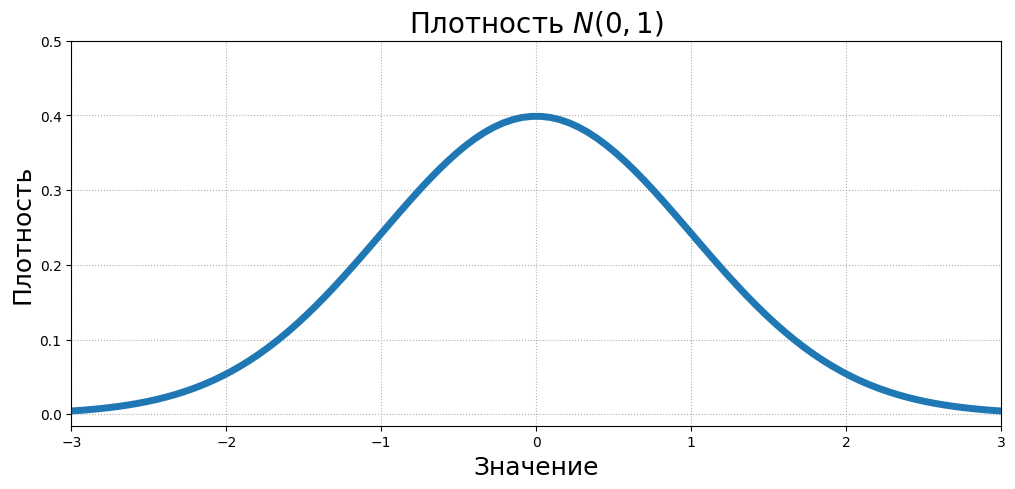

In [6]:
show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=0.5, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=1
)

Сгенерируем значения из нормального стандартного распределения и сравним гистограмму с плотностью.

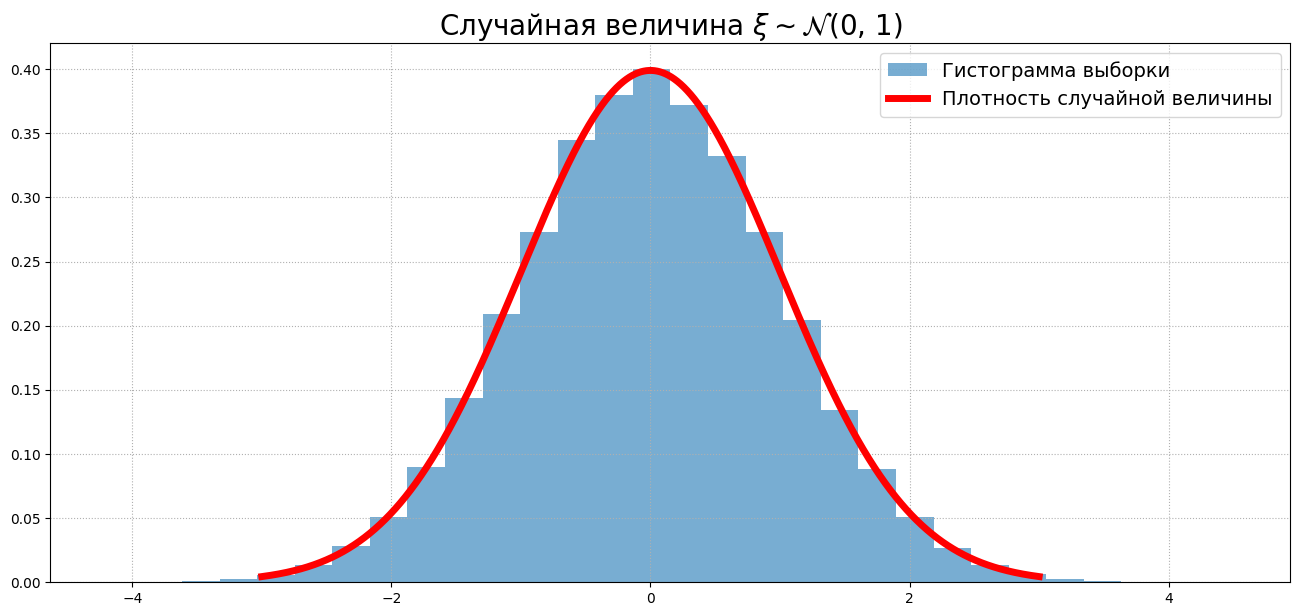

In [7]:
sample = sps.norm.rvs(size=100000)  # выборка размера 100000
grid = np.linspace(-3, 3, 100000)  # сетка для построения графика

plt.figure(figsize=(16, 7))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, sps.norm.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

### Построение графика по функции

Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график.


In [8]:
# создаем массивы numpy и вычисляем списки значений
x = np.arange(-1.25,1.25,0.0001)
y = np.arange(-1,1.25,0.0001)
x_list = []
y_list = []
for i in x:
  for j in y:
    if np.abs(((i**2 + j**2 - 1)**3 - i**2*j**3)) <= 0.00001:
      x_list.append(i)
      y_list.append(j)

In [9]:
# перевод списков в массивы numpy
x = np.asarray(x_list)
y = np.asarray(y_list)

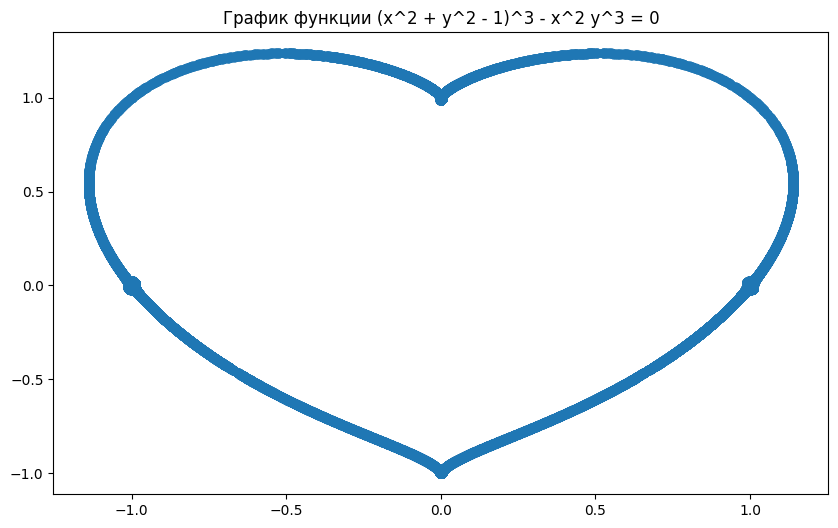

In [10]:
# строим график
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title('График функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0')
plt.show()

### Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию.

In [11]:
# зарузка файла
import urllib.request
destination = 'dataset_home.txt'
url = 'https://lhd8ts4trw.a.trbcdn.net/cdn/yusuciqe45/00_data_engineer/dataset_home.txt'
urllib.request.urlretrieve(url, destination)

('dataset_home.txt', <http.client.HTTPMessage at 0x2003f0ede70>)

In [12]:
# создание пустых списков
age, sex, bmi, smoker, children, region, charges = [], [], [], [], [], [], []

In [13]:
# чтение файла и запись значений в списки
with open("dataset_home.txt", mode = "r") as file:
  for human in file.readlines():
    age.append(int(human.split(",")[0]))

    if human.split(",")[1] == 'male':
      sex.append(1)
    else:
      sex.append(0)

    bmi.append(float(human.split(",")[2]))
    children.append(int(human.split(",")[3]))

    if human.split(",")[4] == 'yes':
      smoker.append(1)
    else:
      smoker.append(0)
    
    if human.split(",")[5] == 'northwest':
      region.append(0)
    elif human.split(",")[5] == 'northeast':
      region.append(1)
    elif human.split(",")[5] == 'southwest':
      region.append(2)
    elif human.split(",")[5] == 'southeast':
      region.append(3)
    else:
      region.append(4)

    charges.append(float(human.split(",")[6]))

In [14]:
# преобразование в массивы numpy
age, sex, bmi, smoker = np.array(age), np.array(sex), np.array(bmi), np.array(smoker)
children, region, charges = np.array(children), np.array(region), np.array(charges)

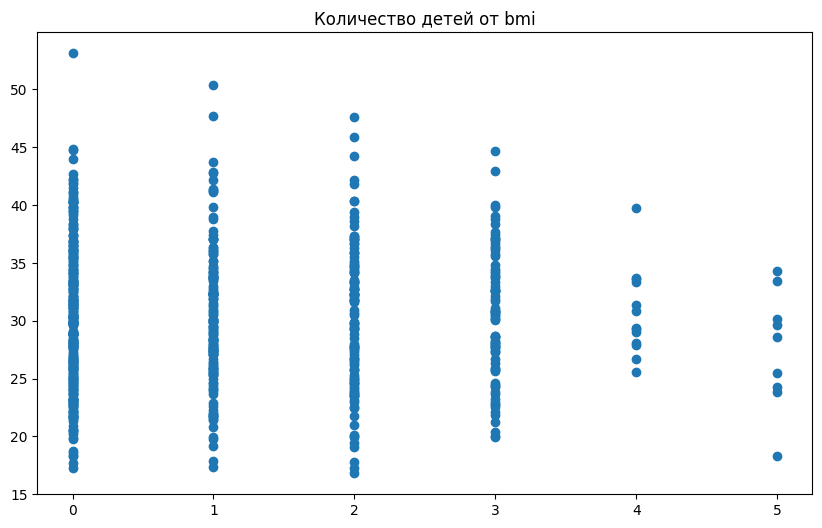

In [15]:
# количество детей от bmi
plt.figure(figsize=(10,6));
plt.scatter(children, bmi);
plt.title('Количество детей от bmi')
plt.show()

BMI: отрицательная корреляция, в среднем BMI уменьшается с количеством детей.

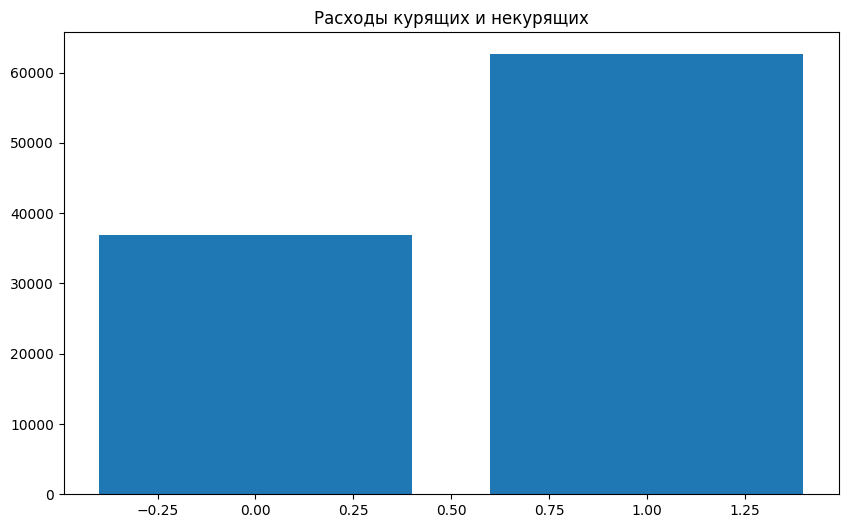

In [16]:
# расходы курящих и некурящих
plt.figure(figsize=(10,6));
plt.bar(smoker, charges);
plt.title('Расходы курящих и некурящих')
plt.show()

Курение: положительная корреляция, больше раходов на страховку у курящих.

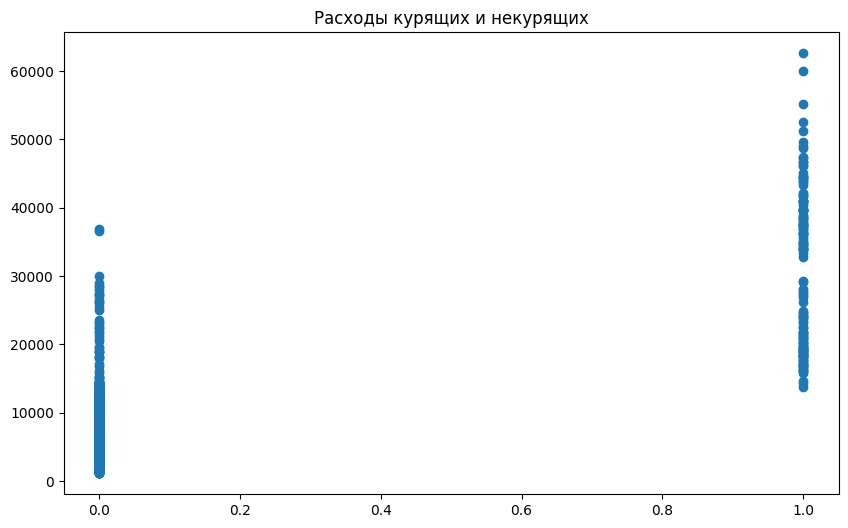

In [17]:
plt.figure(figsize=(10,6));
plt.scatter(smoker, charges);
plt.title('Расходы курящих и некурящих')
plt.show()

Курение. Положительная корреляция, расходы на страховку больше у курящих. У некурящих могут отсутствовать расходы на страховку, всегда есть у курящих.

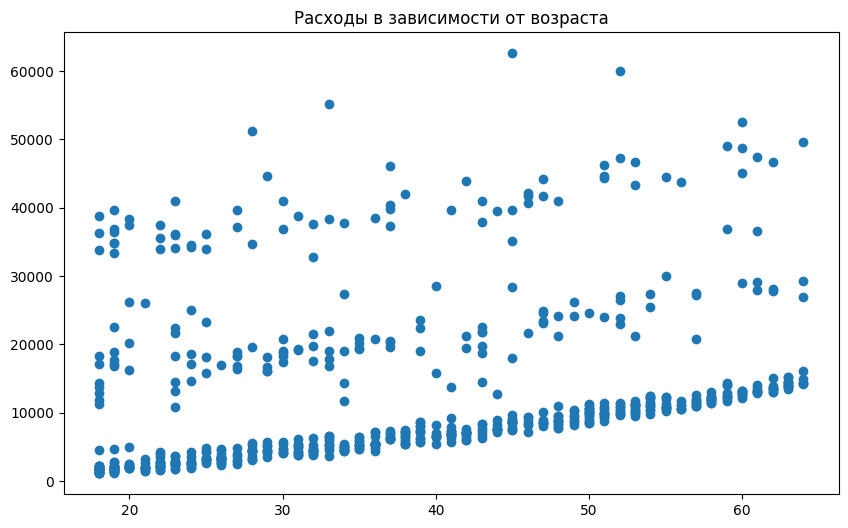

In [18]:
# расходы от возраста
plt.figure(figsize=(10,6));
plt.scatter(age, charges);
plt.title('Расходы в зависимости от возраста')
plt.show()

Возраст: положительная корреляция, расходы растут с возрастом.

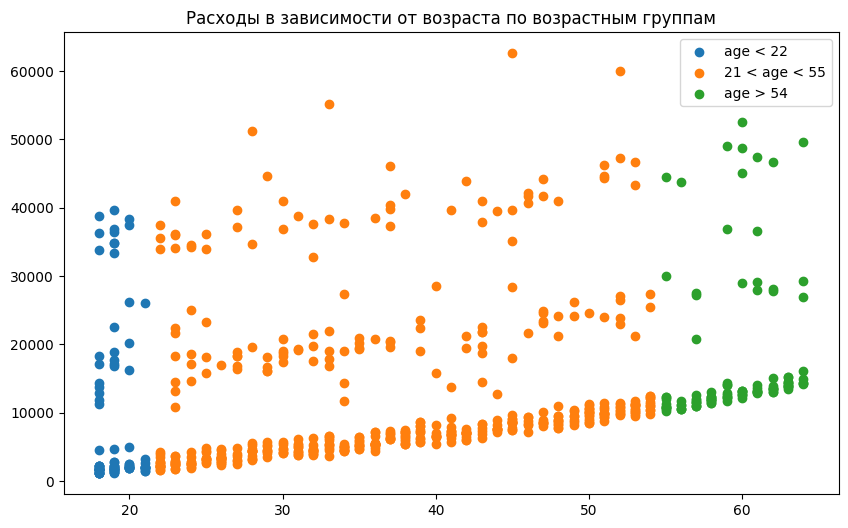

In [19]:
# расходы в зависимости от возраста по возрастным группам
plt.figure(figsize=(10,6));
plt.scatter(age[age < 22], charges[age < 22], label = "age < 22")
plt.scatter(age[age > 21][age[age > 21]<55], charges[age > 21][age[age > 21]<55], label = "21 < age < 55")
plt.scatter(age[age > 54], charges[age > 54], label = "age > 54")
plt.legend()
plt.title('Расходы в зависимости от возраста по возрастным группам')
plt.show()

Возраст: положительная корреляция, расходы растут с возрастом во всех возрастных группах. Три кластера в зависимости от стоимости страховки во всех возрастных группах.

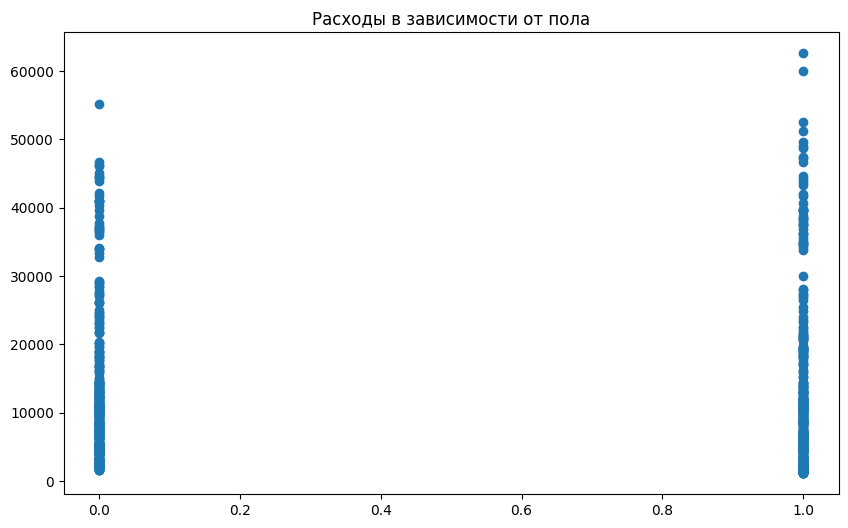

In [20]:
# расходы от пола
plt.figure(figsize=(10,6));
plt.scatter(sex, charges);
plt.title('Расходы в зависимости от пола')
plt.show()

Пол. Зависимость от пола, у мужчин расходы выше.

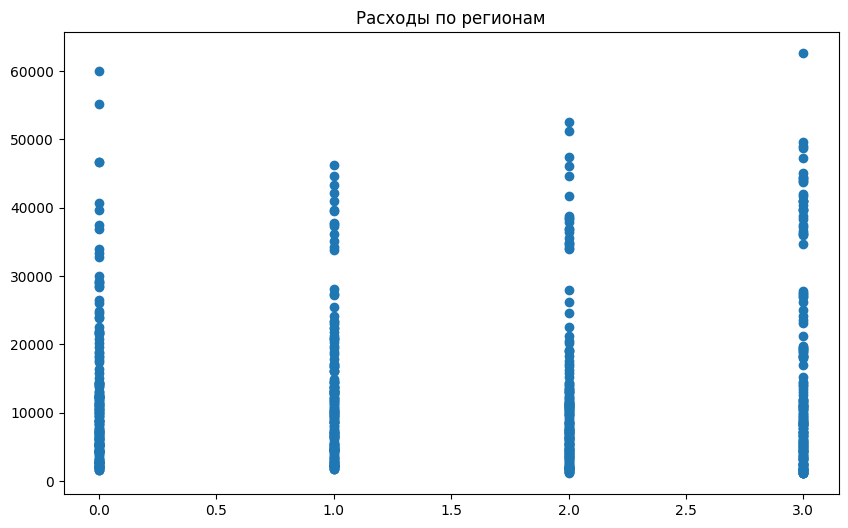

In [21]:
# расходы по регионам
plt.figure(figsize=(10,6));
plt.scatter(region, charges);
plt.title('Расходы по регионам')
plt.show()

Регионы. Нет зависимости расходов от региона, в двух регионах выбросы.

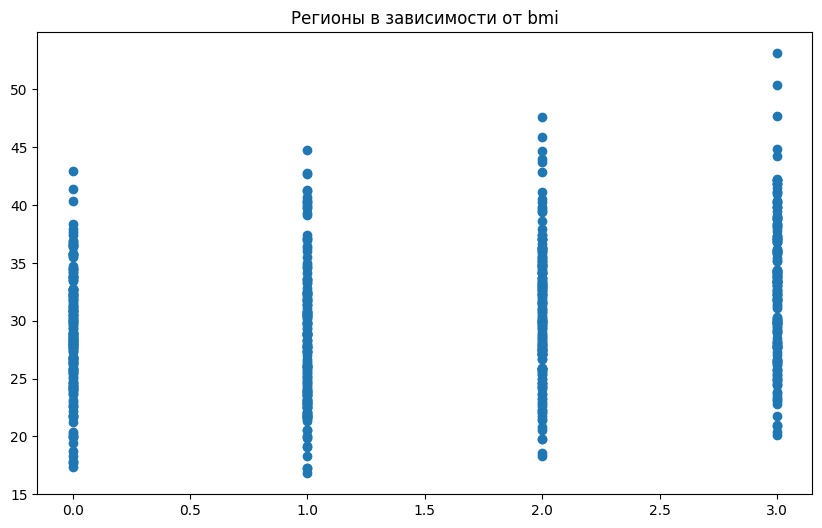

In [22]:
# регионы в зависимости от bmi
plt.figure(figsize=(10,6));
plt.scatter(region, bmi);
plt.title('Регионы в зависимости от bmi')
plt.show()

BMI. Зависимость, во 2-м и 3-м регионе расходы выше.

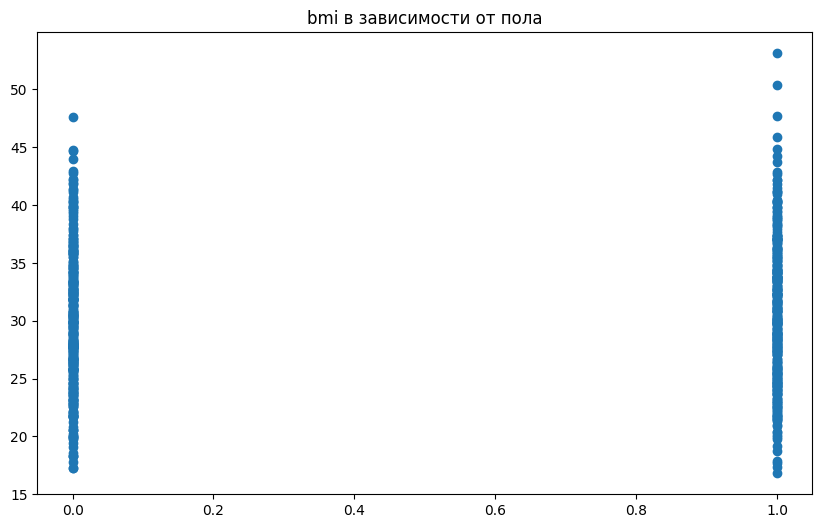

In [23]:
# bmi в зависимости от пола
plt.figure(figsize=(10,6));
plt.scatter(sex, bmi);
plt.title('bmi в зависимости от пола')
plt.show()

BMI. В среднем у мужчин расходы выше и больше выбросов.

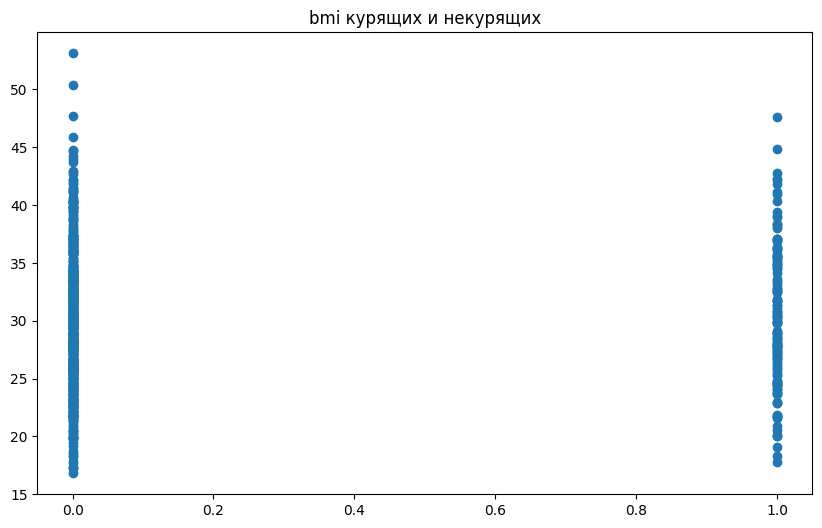

In [24]:
# bmi курящих и некурящих
plt.figure(figsize=(10,6));
plt.scatter(smoker, bmi);
plt.title('bmi курящих и некурящих')
plt.show()

BMI. Зависимость, в среднем у некурящих BMI выше, больше выбросов.

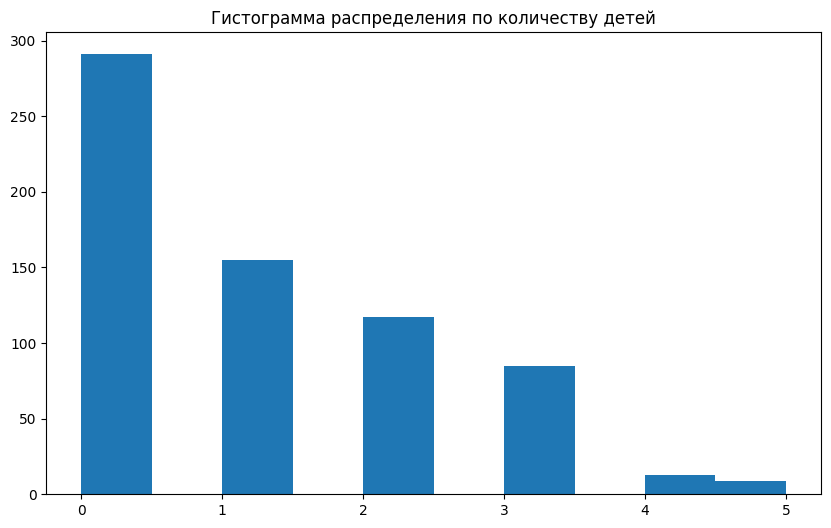

In [25]:
# распределение по количеству детей
plt.figure(figsize=(10,6));
plt.hist(children);
plt.title('Гистограмма распределения по количеству детей')
plt.show()

Количество детей. Отрицательная корреляция, уменьшение количества персон в выборке от числа детей у них.

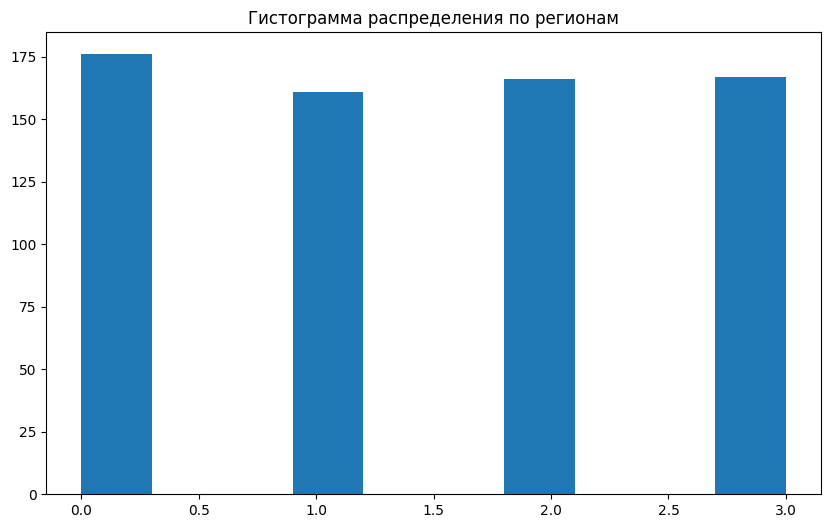

In [26]:
# распределение по регионам
plt.figure(figsize=(10,6));
plt.hist(region);
plt.title('Гистограмма распределения по регионам')
plt.show()

Регионы. Распределение по регионам приблизительно равное.

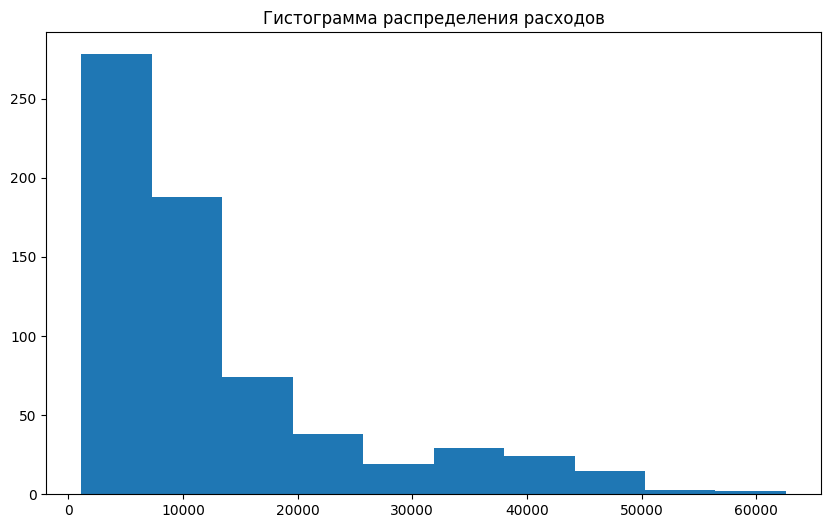

In [27]:
# распределение расходов
plt.figure(figsize=(10,6));
plt.hist(charges);
plt.title('Гистограмма распределения расходов')
plt.show()

Отрицательная корреляция. Количество застрахованных уменьшается с ростом стоимости страховки.

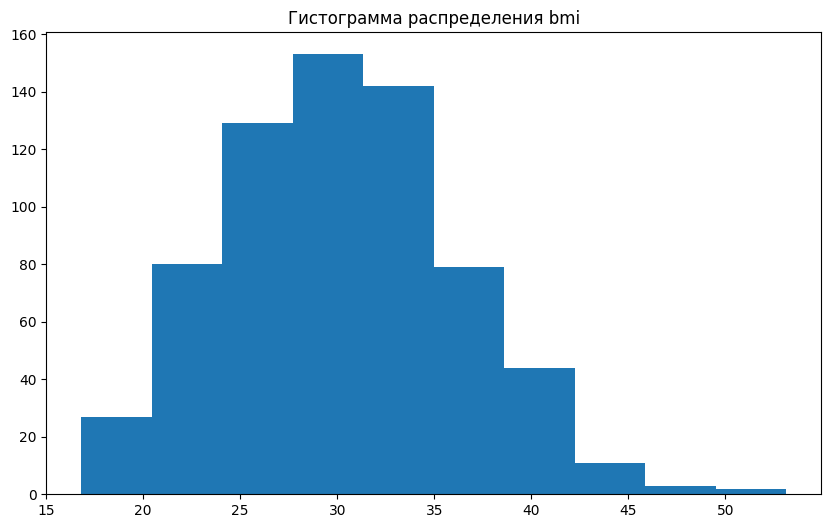

In [28]:
# распределение bmi
plt.figure(figsize=(10,6));
plt.hist(bmi);
plt.title('Гистограмма распределения bmi')
plt.show()

BMI. Распределение близкое к нормальному.

In [29]:
# минимальное, максимальное и среднее значения bmi
bmi.min(), bmi.max(), bmi.mean()

(16.815, 53.13, 30.212865671641794)

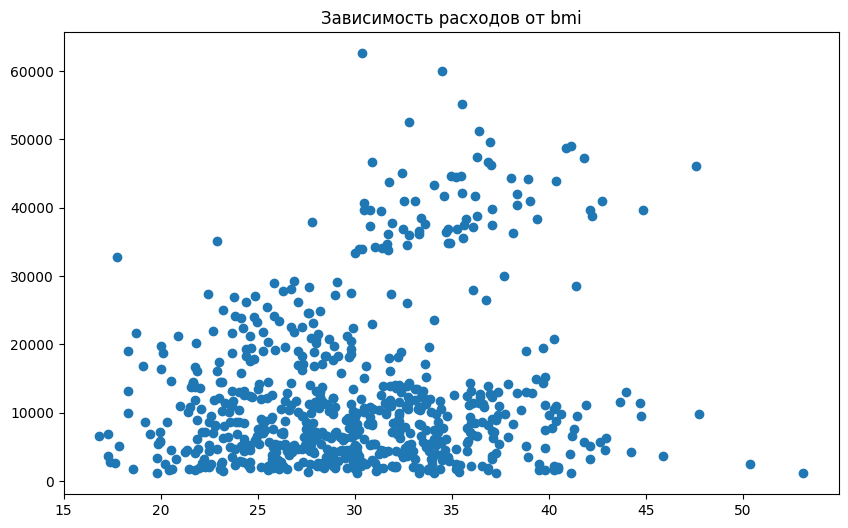

In [30]:
# зависимость расходов от bmi
plt.figure(figsize=(10,6));
plt.scatter(bmi, charges);
plt.title('Зависимость расходов от bmi')
plt.show()

BMI. Положительная корреляция, расходы растут с ростом bmi.